# Numerical Methods For Ordinary Differential Equations

References:
>
> 1. Chasnov, J. R. (2012). Numerical methods. Hong Kong University of Science and Technology. <https://www.math.hkust.edu.hk/~machas/numerical-methods.pdf>

Here we give methods to solve the following initial-value problem of an ordinary differential equation:

$$
\tag{1}
\left\{
\begin{aligned}
\frac{dx}{dt} &= f(t,x) \\
x(t_0) &= x_0
\end{aligned}
\right.
$$

The methods will use a computational grid:

$$
\tag{2}
t_n = t_0 + nh
$$
where $h$ is the grid size.

## Example

Consider $f(t,x)=rx(K-x)$, with the following parameters:

In [16]:
r = 0.15
K = 100
t0 = 0
tf = 1
x0 = 1
n = 10
step_size =  (tf-t0)/n
step_size

1/10

In [17]:
t = var('t')

x = function('x')(t)

ode = x.diff(t) == r*x*(K-x) 

solution = desolve(ode, dvar=x, ivar=t, ics=[t0,x0])

solution

-1/15*log(x(t) - 100) + 1/15*log(x(t)) == -1/15*I*pi + t - 1/15*log(99)

In [18]:
u = var('u')
solution = solution.subs({x: u})
solution 

-1/15*log(u - 100) + 1/15*log(u) == -1/15*I*pi + t - 1/15*log(99)

In [19]:
solution.solve(u, to_poly_solve=True)

[u == 100*e^(15*t)/(e^(15*t) + 99)]

In [20]:
x_exact = solution.solve(u, to_poly_solve=True)[0].rhs()
x_exact

100*e^(15*t)/(e^(15*t) + 99)

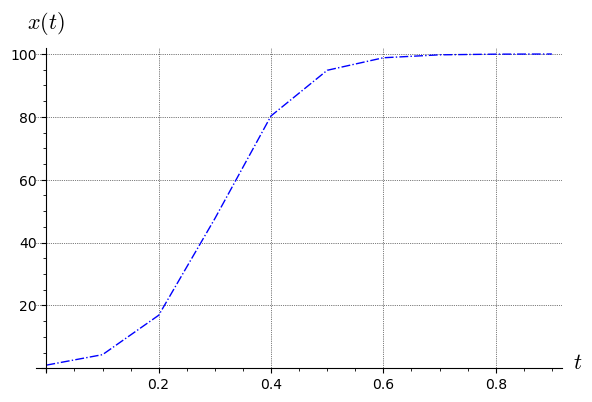

In [21]:
sage_solution = list_plot(exact_solution, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
sage_solution.show()

In [22]:
custom_grid = [t0 + i*step_size for i in range(n)]
exact_solution = [[_t.n(), x_exact(t=_t).n()] for _t in custom_grid]

### Euler Method 

We consider the ODE:

$$
\frac{dx}{dt} = 0.15\,x(100 - x), \quad x(0) = 1
$$

with parameters:

- $r = 0.15$
- $K = 100$
- $t_0 = 0$, $t_f = 1$
- $x_0 = 1$
- $n = 10$, $h = \frac{1 - 0}{10} = 0.1$

Euler's method iterates:

$$
x_{n+1} = x_n + h \cdot f(t_n, x_n)
\quad \text{where} \quad f(t, x) = 0.15\,x(100 - x)
$$


In [23]:
def euler_method(f, x0, t0, t_end, h):
    """
    Implements the Euler method for solving x' = f(t, x)

    Parameters:
        f: a function of (t, x)
        x0: initial value x(t0)
        t0: initial time
        t_end: final time
        h: step size

    Returns:
        A list of (t, x) points
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]

    t = t0
    x = x0

    for _ in range(steps):
        x = x + h * f(t, x)
        t = t + h
        t_vals.append(t)
        x_vals.append(x)

    return list(zip(t_vals, x_vals))

In [24]:
t, x = var('t x')
f(t, x) = r * x * (K - x)  # logistic equation

solution = euler_method(f, x0=x0, t0=t0, t_end=tf, h=step_size)
print(table(solution))

  0      1
  1/10   2.48500000000000
  1/5    6.11987162500000
  3/10   14.7378866319028
  2/5    33.5866370441347
  1/2    67.0456597913201
  3/5    100.187342025499
  7/10   99.9058025317329
  4/5    100.046965636688
  9/10   99.9764840950905
  1      100.011749657488


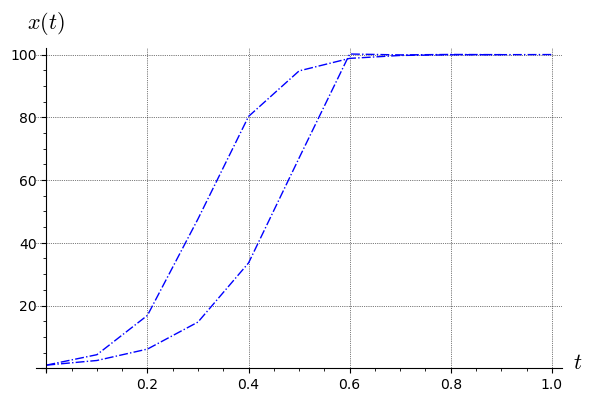

In [25]:
# Plot
euler_solution = list_plot(solution, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_euler = sage_solution + euler_solution
compare_euler.plot()

### Modified Euler Method (Heun's Method)

Update rule:

$$
\begin{aligned}
k_1 &= h \cdot f(t_n, x_n) \\
k_2 &= h \cdot f(t_n + h, x_n + k_1) \\
x_{n+1} &= x_n + \frac{1}{2}(k_1 + k_2)
\end{aligned}
$$


In [26]:
def modified_euler_method(f, x0, t0, t_end, h):
    """
    Implements the Modified Euler method (Heun's Method) for solving x' = f(t, x)

    Parameters:
        f: a function of (t, x)
        x0: initial value x(t0)
        t0: initial time
        t_end: final time
        h: step size

    Returns:
        A list of (t, x) points
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]

    t = t0
    x = x0

    for _ in range(steps):
        k1 = h*f(t, x)
        k2 = h*f(t + h, x + k1)
        x = x + 1/2 * (k1 + k2)
        t = t + h
        t_vals.append(t)
        x_vals.append(x)

    return list(zip(t_vals, x_vals))


In [27]:
solution = modified_euler_method(f, x0=x0, t0=t0, t_end=tf, h=step_size)
print(table(solution))

  0      1
  1/10   3.55993581250000
  1/5    12.0981987959839
  3/10   35.2105812934408
  2/5    68.2387866820014
  1/2    83.9279393373064
  3/5    90.7937517528683
  7/10   94.4806694855871
  4/5    96.6248858139299
  9/10   97.9160188411101
  1      98.7066412316112


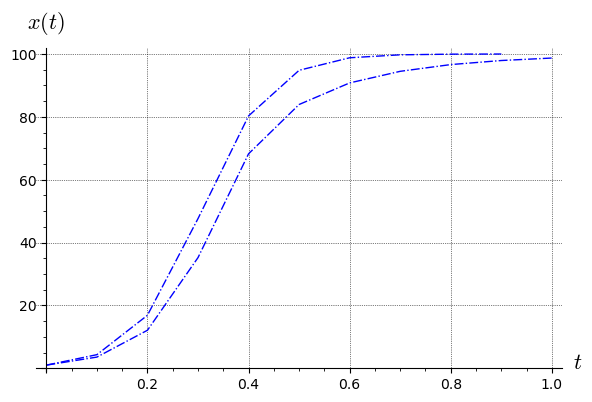

In [28]:
# Plot the numerical approximation
heun_solution = list_plot(solution, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_heun = sage_solution + heun_solution
compare_heun.plot()


### Runge-Kutta 2nd Order Method (General Form)

With parameters:

- $\alpha = \frac{1}{2}$
- $\beta = \frac{1}{2}$
- $a = 0$, $b = 1$

The method iterates:

$$
\begin{aligned}
k_1 &= h \cdot f(t_n, x_n) \\
k_2 &= h \cdot f(t_n + \alpha h, x_n + \beta k_1) \\
x_{n+1} &= x_n + a \cdot k_1 + b \cdot k_2
\end{aligned}
$$



In [29]:
def rk2_general_form(f, x0, t0, t_end, h=0.01,
                       alpha=1/2, beta=1/2, a=0, b=1):
    """
    General second-order Runge-Kutta method using parameters alpha, beta, a, b.

    Solves x' = f(t, x) over [t0, t_end] with initial condition x(t0) = x0.

    Parameters:
        f: right-hand side function f(t, x)
        x0: initial condition x(t0)
        t0: initial time
        t_end: final time
        h: time step size
        alpha: time increment coefficient for k2
        beta: slope coefficient for k2
        a, b: weights for k1 and k2 in the update

    Returns:
        List of (t, x) points approximating the solution
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]

    t = t0
    x = x0

    for _ in range(steps):
        k1 = h * f(t, x)
        k2 = h * f(t + alpha * h, x + beta * k1)
        x = x + a * k1 + b * k2
        t = t + h
        t_vals.append(t)
        x_vals.append(x)

    return list(zip(t_vals, x_vals))

In [30]:
sol = rk2_general_form(f, x0=x0, t0=t0, t_end=tf, h=step_size)
print(table(sol))

  0      1
  1/10   3.56820540625000
  1/5    12.2243797767203
  3/10   36.4679796306508
  2/5    73.7462639150676
  1/2    89.2806698839173
  3/5    94.4049437865197
  7/10   96.8152399914322
  4/5    98.1122177596689
  9/10   98.8564978413984
  1      99.2987101969481


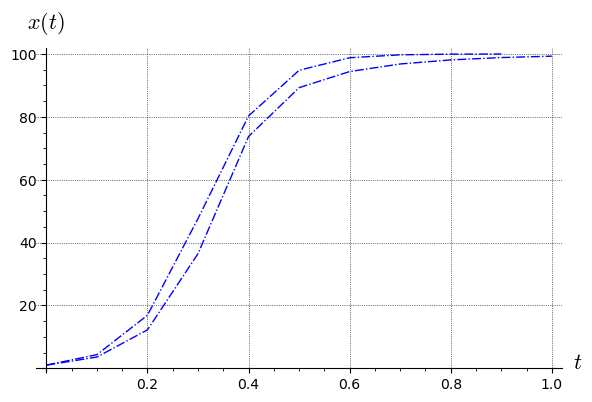

In [31]:
heun_solution  = list_plot(sol, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_heun = heun_solution  + sage_solution
compare_heun.plot()

### Runge-Kutta 2nd Order Method — Ralston's Method

Parameters:

- $\alpha = \frac{3}{4}$
- $\beta = \frac{3}{4}$
- $a = \frac{1}{3}$, $b = \frac{2}{3}$

The method iterates:

$$
\begin{aligned}
k_1 &= h \cdot f(t_n, x_n) \\
k_2 &= h \cdot f\left(t_n + \alpha h, x_n + \beta k_1\right) \\
x_{n+1} &= x_n + a \cdot k_1 + b \cdot k_2
\end{aligned}
$$



In [32]:
sol = rk2_general_form(f, x0=x0, t0=t0, t_end=tf, h=step_size, alpha=3/4, beta=3/4, a=1/3, b=2/3)
print(table(sol))


  0      1
  1/10   3.56407060937500
  1/5    12.1611788883760
  3/10   35.8348988359837
  2/5    70.9621433511138
  1/2    86.7783666438093
  3/5    92.8280660845606
  7/10   95.8380101219556
  4/5    97.5059611393816
  9/10   98.4795175861107
  1      99.0638785287049


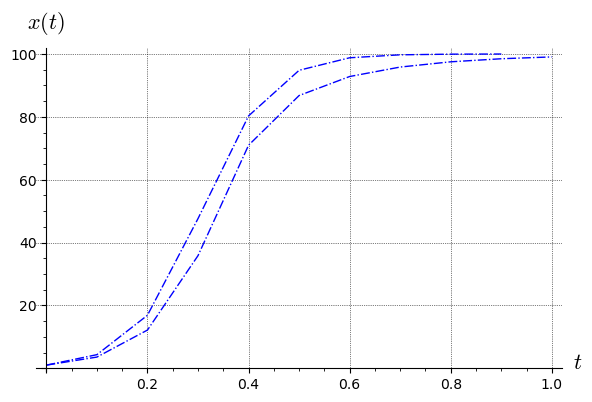

In [33]:
ralston_solution  = list_plot(sol, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_ralston = ralston_solution  + sage_solution
compare_ralston.plot()

### Runge-Kutta 4th Order Method (RK4)

The method iterates:

$$
\begin{aligned}
k_1 &= h \cdot f(t_n, x_n) \\
k_2 &= h \cdot f\left(t_n + \frac{h}{2}, x_n + \frac{k_1}{2}\right) \\
k_3 &= h \cdot f\left(t_n + \frac{h}{2}, x_n + \frac{k_2}{2}\right) \\
k_4 &= h \cdot f(t_n + h, x_n + k_3) \\
x_{n+1} &= x_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{aligned}
$$


In [34]:
def rk4(f, x0, t0, t_end, h=0.01):
    """
    Fourth-order Runge-Kutta method as specified in the image.
    
    Solves x' = f(t, x) over [t0, t_end] with initial condition x(t0) = x0.
    
    Parameters:
        f: right-hand side function f(t, x)
        x0: initial condition x(t0)
        t0: initial time
        t_end: final time
        h: time step size 
        
    Returns:
        List of (t, x) points approximating the solution
    """
    steps = int((t_end - t0) / h)
    t_vals = [t0]
    x_vals = [x0]
    
    t = t0
    x = x0
    
    for _ in range(steps):
        # Calculate the four k values according to the formulas
        k1 = h * f(t, x)
        k2 = h * f(t + 0.5 * h, x + 0.5 * k1)
        k3 = h * f(t + 0.5 * h, x + 0.5 * k2)
        k4 = h * f(t + h, x + k3)
        
        # Update x using the weighted average
        x = x + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        
        # Increment time
        t = t + h
        
        # Store results
        t_vals.append(t)
        x_vals.append(x)
    
    return list(zip(t_vals, x_vals))

In [35]:
sol = rk4(f, x0=x0, t0=t0, t_end=tf, h=step_size)
print(table(sol))

  0      1
  1/10   4.25924796418700
  1/5    16.4281800138575
  3/10   46.6137155116376
  2/5    79.5368754690429
  1/2    94.0774016784928
  3/5    98.3592212006785
  7/10   99.5496497270081
  4/5    99.8767264156260
  9/10   99.9662825003545
  1      99.9907796306712


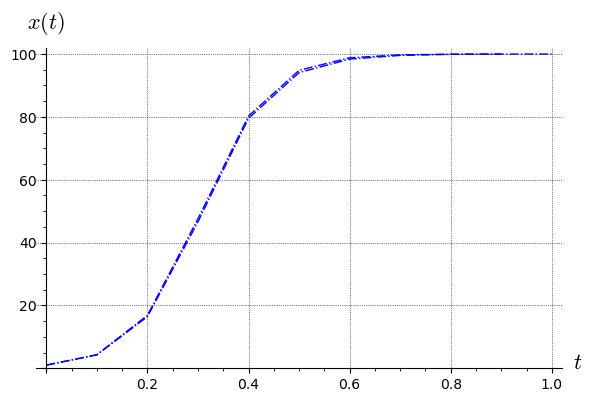

In [36]:
rk4_solution  = list_plot(sol, plotjoined=True, axes_labels=['$t$', '$x(t)$'], gridlines=True, linestyle="-.")
compare_rk4 = rk4_solution  + sage_solution
compare_rk4.plot()